<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise60_MixedColumnarData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from google.colab import files
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
uploaded=files.upload()

In [ ]:
titanic_df=pd.read_csv("Titanic_Train_Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df=titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
le=LabelEncoder()
df=titanic_df
df['Sex']=le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
df=df.dropna()
df.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
df.dtypes

Survived        int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
print(df['Sex'].value_counts())
print(df['SibSp'].value_counts())
print(df['Parch'].value_counts())
print(df['Survived'].value_counts())

1    577
0    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [ ]:
df.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028
std,0.486592,0.477990,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


            Survived       Sex       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.543351 -0.069809 -0.035322  0.081629  0.257307   
Sex        -0.543351  1.000000  0.084153 -0.114631 -0.245489 -0.182333   
Age        -0.069809  0.084153  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322 -0.114631 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629 -0.245489 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.182333  0.091566  0.159651  0.216225  1.000000   
Pclass_1    0.285904 -0.098013  0.319916 -0.054582 -0.017633  0.591711   
Pclass_2    0.093349 -0.064746  0.006589 -0.055932 -0.000734 -0.118557   
Pclass_3   -0.322308  0.137143 -0.281004  0.092548  0.015790 -0.413333   
Embarked_C  0.168240 -0.082853  0.032024 -0.059528 -0.011069  0.269335   
Embarked_Q  0.003650 -0.074115 -0.013855 -0.026354 -0.081228 -0.117216   
Embarked_S -0.149683  0.119224 -0.019336  0.068734  0.060814 -0.162184   

            Pclass_1  Pclass_2  Pclas

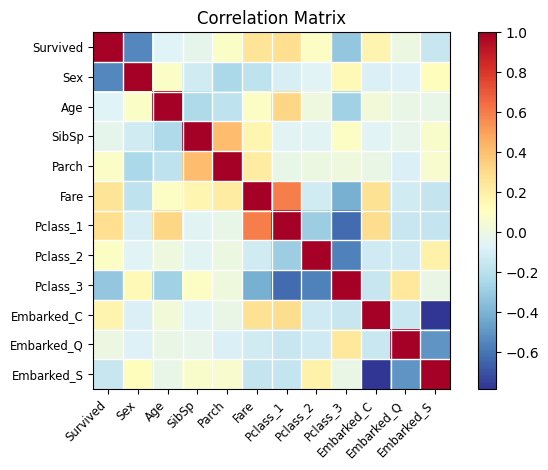

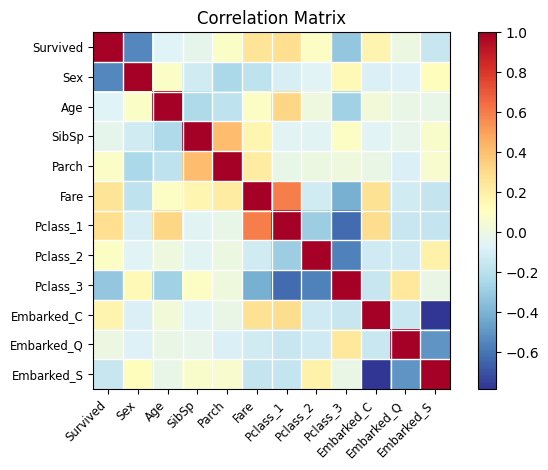

In [ ]:
corr=df.corr()
print(corr)
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [ ]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


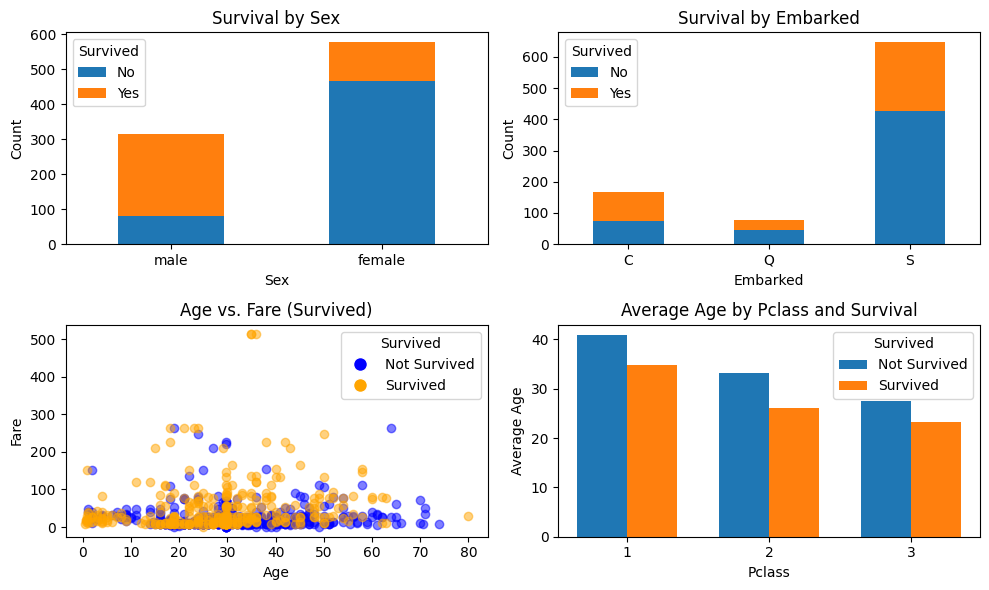

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Subplot 1: Survival by Sex
titanic_df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['male', 'female'], rotation=0)
axes[0, 0].legend(title='Survived', labels=['No', 'Yes'])

# Subplot 2: Survival by Embarked
titanic_df.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Embarked')
axes[0, 1].set_xlabel('Embarked')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['C', 'Q','S'], rotation=0)
axes[0, 1].legend(title='Survived', labels=['No', 'Yes'])

# Subplot 3: Age vs. Fare (Survived)
colors = {0: 'blue', 1: 'orange'}
for survived, group in titanic_df.groupby('Survived'):
    axes[1, 0].scatter(group['Age'], group['Fare'], c=colors[survived], label='Survived' if survived == 1 else 'Not Survived', alpha=0.5)
axes[1, 0].set_title('Age vs. Fare (Survived)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Fare')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Not Survived', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Survived', markerfacecolor='orange', markersize=10),
]
axes[1, 0].legend(handles=legend_elements, title='Survived')

# Subplot 4: Average Age by Pclass and Survival
mean_age_by_class_survived = titanic_df.groupby(['Pclass', 'Survived'])['Age'].mean().unstack()
width = 0.35
x = np.arange(len(mean_age_by_class_survived))
axes[1, 1].bar(x - width/2, mean_age_by_class_survived[0], width, label='Not Survived')
axes[1, 1].bar(x + width/2, mean_age_by_class_survived[1], width, label='Survived')
axes[1, 1].set_xlabel('Pclass')
axes[1, 1].set_ylabel('Average Age')
axes[1, 1].set_title('Average Age by Pclass and Survival')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(mean_age_by_class_survived.index)
axes[1, 1].legend(title='Survived')

plt.tight_layout()
plt.show()


In [ ]:
data=df
scaler=StandardScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Fare']=scaler.fit_transform(data[['Fare']])

In [ ]:
X_train=data.drop('Survived',axis=1).values
y_train=data['Survived'].values

In [ ]:
uploaded=files.upload()

In [ ]:
df_test=pd.read_csv('Titanic_Test_Dataset.csv')
df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test = pd.get_dummies(df_test, columns=['Pclass', 'Embarked'])
df_test.dropna(inplace=True)
print(df_test.isnull().sum())
print(df_test.head())

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
   Sex   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0    1  34.5      0      0   7.8292         0         0         1           0   
1    0  47.0      1      0   7.0000         0         0         1           0   
2    1  62.0      0      0   9.6875         0         1         0           0   
3    1  27.0      0      0   8.6625         0         0         1           0   
4    0  22.0      1      1  12.2875         0         0         1           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1  


In [ ]:
X_test=df_test.values

In [112]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC()
}

# Iterate through models, train, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_train)

    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{model_name} - Accuracy: {accuracy:.2f}')
    print(classification_report(y_train, y_pred))

Decision Tree - Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

Perceptron - Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       549
           1       0.74      0.59      0.66       342

    accuracy                           0.76       891
   macro avg       0.76      0.73      0.74       891
weighted avg       0.76      0.76      0.76       891

Logistic Regression - Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.7

In [114]:
for i in range(-3,4):
  val1=10**i
  for j in range(-3,4):
    val2=10**j
    model=SVC(kernel='rbf', C=val1, gamma=val2)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    if accuracy > 0.95:
      print(f'SVC with RBF kernel - Accuracy(C={val1}; Gamma={val2}): {accuracy:.2f}')
      print(classification_report(y_train, y_pred))

SVC with RBF kernel - Accuracy(C=1; Gamma=1000): 0.96
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.98      0.91      0.94       342

    accuracy                           0.96       891
   macro avg       0.96      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891

SVC with RBF kernel - Accuracy(C=10; Gamma=100): 0.96
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.97      0.91      0.94       342

    accuracy                           0.96       891
   macro avg       0.96      0.95      0.95       891
weighted avg       0.96      0.96      0.96       891

SVC with RBF kernel - Accuracy(C=10; Gamma=1000): 0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       549
           1       0.98      0.93      0.96       342

    accuracy       

In [115]:
for crit in ['gini','entropy']:
  model = DecisionTreeClassifier(criterion=crit, random_state=42, max_depth=None)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  if accuracy > 0.75:
    print(f'Decision Tree Classifier - Accuracy(Criterion = {crit}): {accuracy:.2f}')
    print(classification_report(y_train, y_pred))

Decision Tree Classifier - Accuracy(Criterion = gini): 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

Decision Tree Classifier - Accuracy(Criterion = entropy): 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [130]:
model_test=DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=None)
model_test.fit(X_train, y_train)
y_test_pred=model_test.predict(X_test)
df_test['Survived']=y_test_pred
df_test.head(10)

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,34.5,0,0,7.8292,0,0,1,0,1,0,0
1,0,47.0,1,0,7.0000,0,0,1,0,0,1,1
2,1,62.0,0,0,9.6875,0,1,0,0,1,0,0
3,1,27.0,0,0,8.6625,0,0,1,0,0,1,0
4,0,22.0,1,1,12.2875,0,0,1,0,0,1,0
5,1,14.0,0,0,9.2250,0,0,1,0,0,1,0
6,0,30.0,0,0,7.6292,0,0,1,0,1,0,1
7,1,26.0,1,1,29.0000,0,1,0,0,0,1,0
8,0,18.0,0,0,7.2292,0,0,1,1,0,0,1
9,1,21.0,2,0,24.1500,0,0,1,0,0,1,0
